Celem projektu jest wnioskowanie przyszłych cen kryptowaluty Bitcoin.

Pierwszym krokiem będzie zebranie istniejących historycznych danych oraz odpowiednie ich przygotowaneie.
Źródło danych:  https://data.bitcoinity.org/markets/price_volume/all/USD?r=day&t=lb&vu=curr

Wynikiem pierwszzego kroku będzie przygotowany plik CSV z tabelą zawierającą odpowiednie dane, która posłuży w kroku drugim.

KROK 1

In [1]:
import pandas as pd
import numpy as np

In [2]:
import glob

# Zapisanie ścieżki, która ma być przeszukana do odnalezienia ściągniętych plików z danymi:

pattern = 'data/*.csv'

# Zapisanie ścieżek do wszyskich plików *.csv: csv_files:

csv_files = glob.glob(pattern)

In [3]:
# Wyświetlenie nazw plików z danymi:

for no in range(len(csv_files)):
        print('File number:', no, ' name:' ,csv_files[no])

File number: 0  name: data\bitcoinity_data_hashrrates.csv
File number: 1  name: data\bitcoinity_data_marketcap.csv
File number: 2  name: data\bitcoinity_data_mining_difficulty.csv
File number: 3  name: data\bitcoinity_data_notransactions.csv
File number: 4  name: data\bitcoinity_data_price_volume.csv
File number: 5  name: data\bitcoinity_data_volatility.csv


Objaśnienie obserwowanych zmiennych:

    - Hashrates - szybkość obliczeniowa maszyn w sieci BTC, służąca do szyfrowania/zabezpieczania tranzakcji (domyślnie w GH/s)
    - Marketcap (market capitalization) - kapitalizacja giełdowa - analogicznie do rynku giełdowego akcji - iloczyn aktualnego  kursu akcji i liczby akcji spółki w obrocie giełdowym (np 5,549.46 BTC/USD * 17.5M bitcoins )
    - Mining difficulty - Liczba określająca stopień trudności wydobycia bloku w sieci bitcoin. Im więcej mocy obliczeniowej, trudność rośnie aby dostosować czas wydobycia  bloku do założonych około 10 minut. Sieć bitcoina jest więc siecią samoregulującą się do określonych warunków w danym czasie
    - No of transactions - liczba wykonywanych transakcji w sieci BTC w ciągu minuty
    - Price and Volume - cena jednostki BTC w USD oraz wartość rynkowa w milionach USD
    - Volatility - zmiennośc ceny bitcoina, odchylenie standardowe ze wszystkich giełd

In [4]:
csv_files[4]

'data\\bitcoinity_data_price_volume.csv'

In [5]:
# Utworzenie tymczasowego dataframe "temp" z danymi z pliku

temp = pd.read_csv(csv_files[4],
                   sep=',',delimiter=',', header=0, index_col='Time')  ## , dtype=float, 

In [6]:
# Sprawdzenie nazw kolumn:

temp.columns

Index(['price', 'volume'], dtype='object')

In [7]:
temp.head(3)

,price,volume
Time,,
2010-07-17 00:00:00 UTC,0.049510,0.990200
2010-07-18 00:00:00 UTC,0.077975,5.091994
2010-07-19 00:00:00 UTC,0.086792,49.731775


In [8]:
# Utworzenie DataFrame BTC_data z interesującymi nas danymi "cena i volume" 

BTC_data = temp
BTC_data.columns = ['Price', 'Volume']

In [9]:
BTC_data.head(3)

,Price,Volume
Time,,
2010-07-17 00:00:00 UTC,0.049510,0.990200
2010-07-18 00:00:00 UTC,0.077975,5.091994
2010-07-19 00:00:00 UTC,0.086792,49.731775


In [10]:
csv_files[0]

'data\\bitcoinity_data_hashrrates.csv'

In [11]:
# Utworzenie tymczasowego dataframe "temp" z danymi z pliku "*_hashrates.csv"

temp = []
temp = pd.read_csv(csv_files[0],
                   sep=',',delimiter=',', header=0, index_col='Time') 
temp.columns

Index(['50BTC.com', 'AntPool', 'BTC Guild', 'BTCC Pool', 'BW.COM', 'BitFury',
       'BitMinter', 'Eligius', 'F2Pool', 'KnCMiner', 'SlushPool', 'Unknown',
       'ViaBTC', 'ghash.io', 'others'],
      dtype='object')

In [12]:
temp.head(3)

,50BTC.com,AntPool,BTC Guild,BTCC Pool,BW.COM,BitFury,BitMinter,Eligius,F2Pool,KnCMiner,SlushPool,Unknown,ViaBTC,ghash.io,others
Time,,,,,,,,,,,,,,,
2009-01-09 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.425148e+06,NaN,NaN,NaN
2009-01-10 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.676938e+06,NaN,NaN,NaN
2009-01-11 00:00:00 UTC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.679436e+06,NaN,NaN,NaN


In [13]:
# Zastąpienie danych z różnych giełd średnią

temp['Hash_rates'] = temp.mean(axis=1)

In [14]:
temp['Hash_rates'].head(3)

Time
2009-01-09 00:00:00 UTC    9.425148e+06
2009-01-10 00:00:00 UTC    1.676938e+06
2009-01-11 00:00:00 UTC    4.679436e+06
Name: Hash_rates, dtype: float64

In [15]:
BTC_data = BTC_data.join(temp['Hash_rates'])

In [16]:
BTC_data.head(3)

,Price,Volume,Hash_rates
Time,,,
2010-07-17 00:00:00 UTC,0.049510,0.990200,1.579310e+09
2010-07-18 00:00:00 UTC,0.077975,5.091994,1.575160e+09
2010-07-19 00:00:00 UTC,0.086792,49.731775,1.541829e+09


In [17]:
# Dodanie danych z pliku "Marketcap"

file_no = 1
plik = csv_files[file_no]
plik

'data\\bitcoinity_data_marketcap.csv'

In [18]:
temp = []

temp = pd.read_csv(plik,
                   sep=',',delimiter=',', header=0, index_col='Time')  ## , dtype=float, 
temp.columns

Index(['Unnamed: 1'], dtype='object')

In [19]:
temp.columns =['Market_cap']

In [20]:
temp['Market_cap'].head(3)

Time
2010-07-22 00:00:00 UTC    280079.37205
2010-07-23 00:00:00 UTC    203592.21770
2010-07-24 00:00:00 UTC    215564.14850
Name: Market_cap, dtype: float64

In [21]:
BTC_data = BTC_data.join(temp)

In [22]:
BTC_data.head(10)

,Price,Volume,Hash_rates,Market_cap
Time,,,,
2010-07-17 00:00:00 UTC,0.049510,0.990200,1.579310e+09,NaN
2010-07-18 00:00:00 UTC,0.077975,5.091994,1.575160e+09,NaN
2010-07-19 00:00:00 UTC,0.086792,49.731775,1.541829e+09,NaN
2010-07-20 00:00:00 UTC,0.077999,20.595480,1.618386e+09,NaN
2010-07-21 00:00:00 UTC,0.070463,42.554942,1.871377e+09,NaN
2010-07-22 00:00:00 UTC,0.064120,131.521321,1.600886e+09,280079.37205
2010-07-23 00:00:00 UTC,0.061780,148.019114,1.735938e+09,203592.21770
2010-07-24 00:00:00 UTC,0.055815,26.740300,1.706393e+09,215564.14850
2010-07-25 00:00:00 UTC,0.054912,84.877296,2.091453e+09,194593.45750


In [23]:
# Dodanie danych "Mining_difficulty"

file_no = 2
plik = csv_files[file_no]
plik

'data\\bitcoinity_data_mining_difficulty.csv'

In [24]:
temp = []

temp = pd.read_csv(plik,
                   sep=',',delimiter=',', header=0, index_col='Time')  ## , dtype=float, 
temp.columns

Index(['Unnamed: 1'], dtype='object')

In [25]:
temp.columns =['Mining_difficulty']

In [26]:
temp['Mining_difficulty'].head(3)

Time
2009-01-09 00:00:00 UTC    1.0
2009-01-10 00:00:00 UTC    1.0
2009-01-11 00:00:00 UTC    1.0
Name: Mining_difficulty, dtype: float64

In [27]:
BTC_data = BTC_data.join(temp)

In [28]:
BTC_data.head(10)

,Price,Volume,Hash_rates,Market_cap,Mining_difficulty
Time,,,,,
2010-07-17 00:00:00 UTC,0.049510,0.990200,1.579310e+09,NaN,181.543289
2010-07-18 00:00:00 UTC,0.077975,5.091994,1.575160e+09,NaN,181.543289
2010-07-19 00:00:00 UTC,0.086792,49.731775,1.541829e+09,NaN,181.543289
2010-07-20 00:00:00 UTC,0.077999,20.595480,1.618386e+09,NaN,181.543289
2010-07-21 00:00:00 UTC,0.070463,42.554942,1.871377e+09,NaN,181.543289
2010-07-22 00:00:00 UTC,0.064120,131.521321,1.600886e+09,280079.37205,181.543289
2010-07-23 00:00:00 UTC,0.061780,148.019114,1.735938e+09,203592.21770,181.543289
2010-07-24 00:00:00 UTC,0.055815,26.740300,1.706393e+09,215564.14850,181.543289
2010-07-25 00:00:00 UTC,0.054912,84.877296,2.091453e+09,194593.45750,181.543289


In [29]:
# Dodanie kolumny z danymi "No_of_transactions"

file_no = 3
plik = csv_files[file_no]
plik

'data\\bitcoinity_data_notransactions.csv'

In [30]:
temp = []

temp = pd.read_csv(plik,
                   sep=',',delimiter=',', header=0, index_col='Time')  ## , dtype=float, 
temp.columns

Index(['Unnamed: 1'], dtype='object')

In [31]:
temp.columns =['No_of_transactions']
temp['No_of_transactions'].head(3)

Time
2009-01-09 00:00:00 UTC    14.0
2009-01-10 00:00:00 UTC    61.0
2009-01-11 00:00:00 UTC    93.0
Name: No_of_transactions, dtype: float64

In [32]:
BTC_data = BTC_data.join(temp)

In [33]:
BTC_data.head(10)

,Price,Volume,Hash_rates,Market_cap,Mining_difficulty,No_of_transactions
Time,,,,,,
2010-07-17 00:00:00 UTC,0.049510,0.990200,1.579310e+09,NaN,181.543289,408.0
2010-07-18 00:00:00 UTC,0.077975,5.091994,1.575160e+09,NaN,181.543289,420.0
2010-07-19 00:00:00 UTC,0.086792,49.731775,1.541829e+09,NaN,181.543289,528.0
2010-07-20 00:00:00 UTC,0.077999,20.595480,1.618386e+09,NaN,181.543289,594.0
2010-07-21 00:00:00 UTC,0.070463,42.554942,1.871377e+09,NaN,181.543289,463.0
2010-07-22 00:00:00 UTC,0.064120,131.521321,1.600886e+09,280079.37205,181.543289,397.0
2010-07-23 00:00:00 UTC,0.061780,148.019114,1.735938e+09,203592.21770,181.543289,411.0
2010-07-24 00:00:00 UTC,0.055815,26.740300,1.706393e+09,215564.14850,181.543289,894.0
2010-07-25 00:00:00 UTC,0.054912,84.877296,2.091453e+09,194593.45750,181.543289,1823.0


In [34]:
# Dodanie kolumny "Volatility"

file_no = 5
plik = csv_files[file_no]
plik

'data\\bitcoinity_data_volatility.csv'

In [35]:
temp = []

temp = pd.read_csv(plik,
                   sep=',',delimiter=',', header=0, index_col='Time')  ## , dtype=float, 
temp.columns

Index(['anxbtc', 'bitcoin24', 'bitcurex', 'bitfloor', 'btce', 'cex.io',
       'coinbase', 'coinsetter', 'exmo', 'gatecoin', 'gemini', 'justcoin',
       'lakebtc', 'mtgox', 'others'],
      dtype='object')

In [36]:
temp['Volatility'] = temp.mean(axis=1)

In [37]:
temp['Volatility'].head(3)

Time
2010-07-19 00:00:00 UTC    0.002372
2010-07-20 00:00:00 UTC    0.001050
2010-07-21 00:00:00 UTC    0.001695
Name: Volatility, dtype: float64

In [38]:
BTC_data = BTC_data.join(temp['Volatility'])

In [39]:
BTC_data.head(10)

,Price,Volume,Hash_rates,Market_cap,Mining_difficulty,No_of_transactions,Volatility
Time,,,,,,,
2010-07-17 00:00:00 UTC,0.049510,0.990200,1.579310e+09,NaN,181.543289,408.0,NaN
2010-07-18 00:00:00 UTC,0.077975,5.091994,1.575160e+09,NaN,181.543289,420.0,NaN
2010-07-19 00:00:00 UTC,0.086792,49.731775,1.541829e+09,NaN,181.543289,528.0,0.002372
2010-07-20 00:00:00 UTC,0.077999,20.595480,1.618386e+09,NaN,181.543289,594.0,0.001050
2010-07-21 00:00:00 UTC,0.070463,42.554942,1.871377e+09,NaN,181.543289,463.0,0.001695
2010-07-22 00:00:00 UTC,0.064120,131.521321,1.600886e+09,280079.37205,181.543289,397.0,0.002055
2010-07-23 00:00:00 UTC,0.061780,148.019114,1.735938e+09,203592.21770,181.543289,411.0,0.002835
2010-07-24 00:00:00 UTC,0.055815,26.740300,1.706393e+09,215564.14850,181.543289,894.0,0.000643
2010-07-25 00:00:00 UTC,0.054912,84.877296,2.091453e+09,194593.45750,181.543289,1823.0,0.001277


In [40]:
BTC_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2631 entries, 2010-07-17 00:00:00 UTC to 2017-09-28 00:00:00 UTC
Data columns (total 7 columns):
Price                 2631 non-null float64
Volume                2631 non-null float64
Hash_rates            2631 non-null float64
Market_cap            2321 non-null float64
Mining_difficulty     2631 non-null float64
No_of_transactions    2631 non-null float64
Volatility            2600 non-null float64
dtypes: float64(7)
memory usage: 244.4+ KB


In [41]:
BTC_data.isnull().sum()

Price                   0
Volume                  0
Hash_rates              0
Market_cap            310
Mining_difficulty       0
No_of_transactions      0
Volatility             31
dtype: int64

In [42]:
BTC_data = BTC_data.dropna(axis=0)

In [43]:
BTC_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2321 entries, 2010-07-22 00:00:00 UTC to 2017-09-28 00:00:00 UTC
Data columns (total 7 columns):
Price                 2321 non-null float64
Volume                2321 non-null float64
Hash_rates            2321 non-null float64
Market_cap            2321 non-null float64
Mining_difficulty     2321 non-null float64
No_of_transactions    2321 non-null float64
Volatility            2321 non-null float64
dtypes: float64(7)
memory usage: 145.1+ KB


In [44]:
# Końcowa wersja tabeli z danymi:

BTC_data.tail(3)

,Price,Volume,Hash_rates,Market_cap,Mining_difficulty,No_of_transactions,Volatility
Time,,,,,,,
2017-09-26 00:00:00 UTC,3926.398515,2.051000e+08,8.351330e+17,6.848397e+10,1.103401e+12,263648.0,7.523801
2017-09-27 00:00:00 UTC,4041.845466,3.987348e+08,9.034071e+17,6.789660e+10,1.103401e+12,257961.0,8.819842
2017-09-28 00:00:00 UTC,4194.083824,3.113825e+08,1.075711e+18,7.304576e+10,1.103401e+12,275976.0,14.386137


In [45]:
# Zapisanie tabeli do pliku

BTC_data.to_csv('data\KROK_1\BTC_data.csv', index=True, sep=',')

Dalsza część związana z predykcją i zastosowania sieci LSTM w notebooku "KROK_2 LSTM.ipynb"

In [46]:
# Sprawdzam korelację pomiędzy zmiennymi, które zebrałem dla BTC

In [47]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

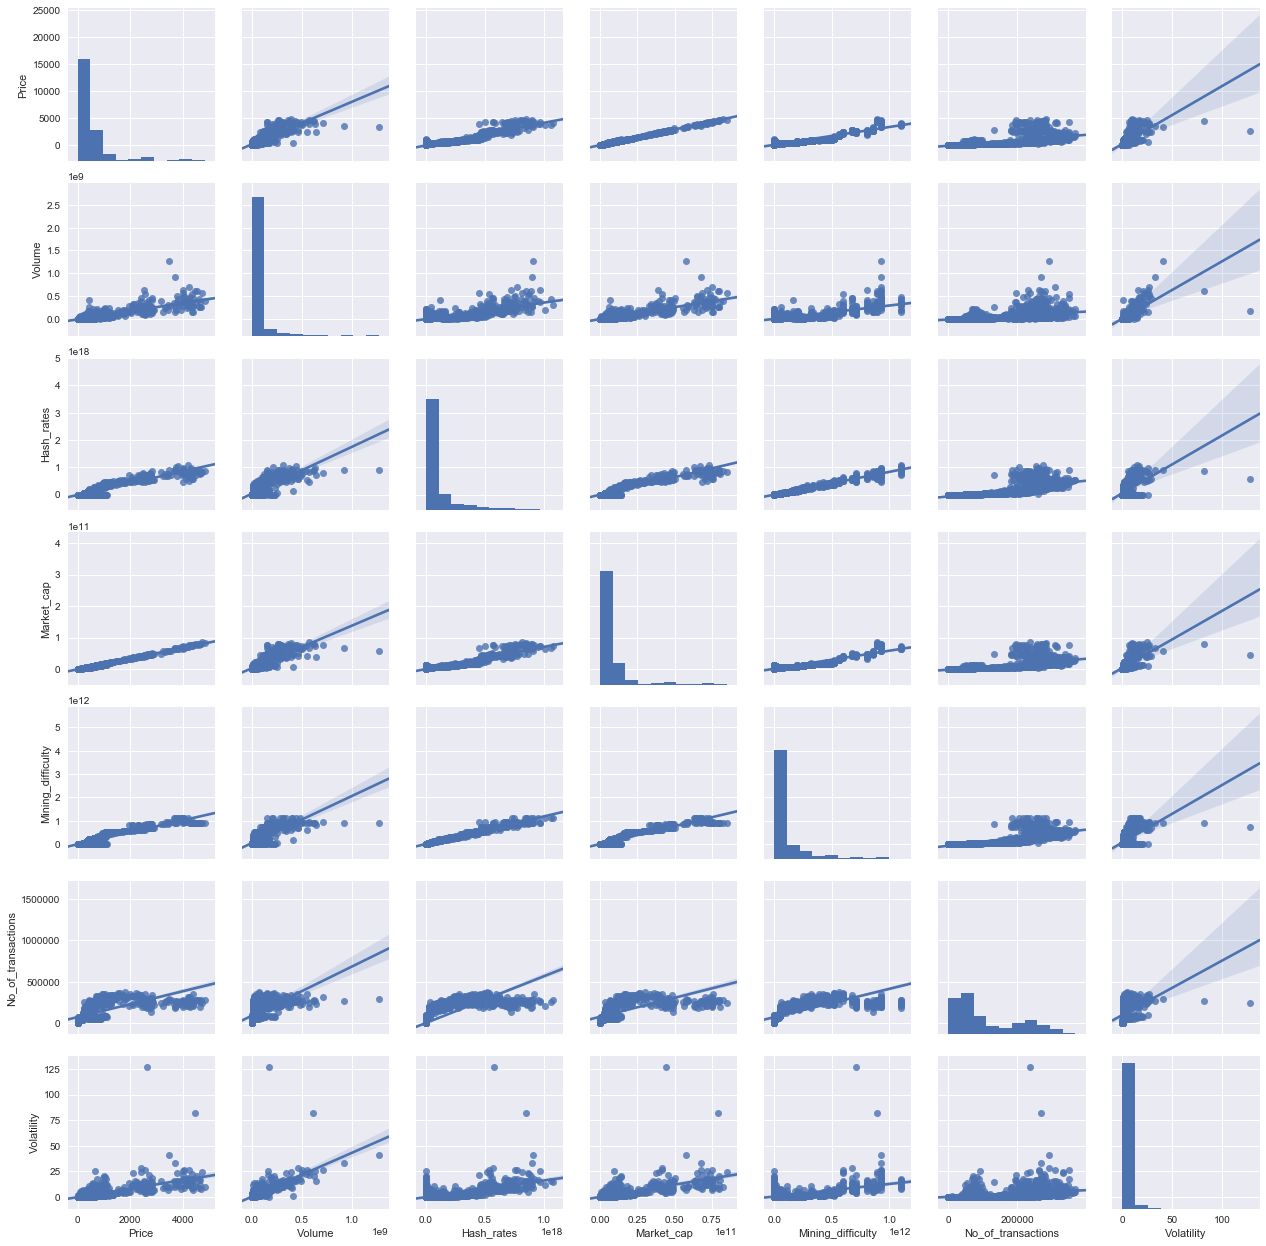

In [48]:
sns.pairplot(BTC_data,kind='reg');
plt.show()

Jak widac na powyższych wykresach zmienna "Price" jest bardzo zależna od "Hash_rates", "Market_cap" oraz "Mining_difficulty" i "No_of_transactions". Cena BTC jest mniej skorelowana ze zmiennymi "Volume" oraz "Volatility". 

Sprawdzam korelację zmiennej "Price" z innymi zmiennymi przy użyciu współczninnika korelacji:

- Pearsona - wspólczynnik korelacji liniowej dwóch zmiennych losowych

- Spearmana - wspólczynnik korelacji rangowej. Zależność liniowa i nieliniowa dwóch zmiennych

- Kendall'a - opisuje korelację między zmiennymi porządkowymi

In [49]:
for k in (BTC_data.columns):
    print('\n', 'Price to', k,'corelation', ': ')
    corr = {}
    corr['Pearson'], _ = stats.pearsonr(BTC_data['Price'], BTC_data[k])
    corr['Spearman'], _ = stats.spearmanr(BTC_data['Price'], BTC_data[k])
    corr['Kendall'], _ = stats.kendalltau(BTC_data['Price'], BTC_data[k])
    print(corr)


 Price to Price corelation : 
{'Pearson': 1.0, 'Spearman': 1.0, 'Kendall': 1.0}

 Price to Volume corelation : 
{'Pearson': 0.83989731724609507, 'Spearman': 0.87050918758229578, 'Kendall': 0.70723454515740847}

 Price to Hash_rates corelation : 
{'Pearson': 0.91821406099085034, 'Spearman': 0.87731840922018678, 'Kendall': 0.73031466817216129}

 Price to Market_cap corelation : 
{'Pearson': 0.99725749381635431, 'Spearman': 0.99647058440760472, 'Kendall': 0.96108469892584958}

 Price to Mining_difficulty corelation : 
{'Pearson': 0.92247315592156975, 'Spearman': 0.87619773445810867, 'Kendall': 0.7314926485186003}

 Price to No_of_transactions corelation : 
{'Pearson': 0.62902685959430948, 'Spearman': 0.84964238536832382, 'Kendall': 0.67991109632324498}

 Price to Volatility corelation : 
{'Pearson': 0.66796158284889684, 'Spearman': 0.88588093160384185, 'Kendall': 0.71734834866065467}


Po wynikach widać, że współczynnik Pearsona ma korelację dodatnią od dość mocnej do bardzo silnej z resztą zmiennych.

Dalsza część związana z predykcją i zastosowania sieci LSTM w notebooku "KROK_2 LSTM.ipynb"